<a href="https://colab.research.google.com/github/Arbaz101/Hello-world/blob/master/Deep%20Learning/Convolution%20Neural%20Nets/Object_detection_SIFT_%26_ORB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SIFT (Scale Invariant Feature Transform)**

Patented and no longer freely available with OpenCV 3.0+

1. We firstly detect interesting key points in an image using the **Difference of Gaussian** method. These are areas of the image where variation exceeds a certain threshold and are better than edge descriptions.
2. We then create vector descriptor for these interesting areas. Scale invariance is achieved via the foll:
    
    * Interest points are scanned at several different scales
    * The scale at which we meet a specific stability criteria, is then selected and is encoded by the vector descriptor. Therefore, regardless of the initial size, the more stable scale is found which allows us to be scale invariant.
3. Rotation invariance is achieved by obtaining the Orintation assignment of the key point using image gradient magnitudes. Once we know the 2D direction, we can normalize this direction.

**SURF (Speeded up Robust Features)**

1. SIFT is quite effective but computationally expensive
2. SURF was developed to improve the speed of a scale invariant feature detector
3. Instead of using the Difference of Gaussian approach, SURF uses **Hessian matrix approximation** to detect interesting points and use the **sum of Haar wavelet responses** for orientation assignment.

**Alternatives to SIFT and SURF**

1. Features from Accelerated Segment Test(FAST)

    * Key point detection only(no descriptor, we can use SIFT or SURF to computer that)
    * Used in real time applications
2. Binary Robust Independent Elementary Features(BRIEF)
    
    * Computers descriptors quickly(instead of using SIFT or SURF)
    * FAST

3. Oriented FAST and Rotated BRIEF(ORB) - developed out of OpenCV labs thus free to use

    * Combinations of both FAST and BRIEF

Steps:

1. Create Detector
2. Input image into detector
3. Obtain key points
4. Draw Key points

**SIFT Working**

In [ ]:
pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6MB 147kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


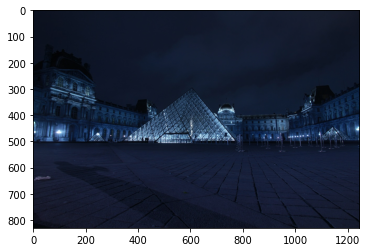

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/Deep learning datasets/images/input.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#create SIFT Feature detector object
sift = cv2.xfeatures2d.SIFT_create()

plt.imshow(image)

no of keypoints 1890


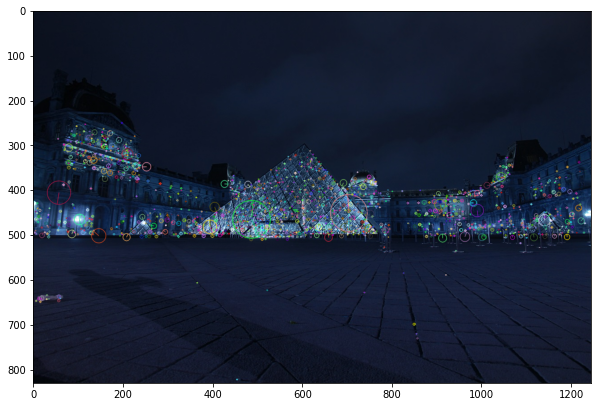

In [ ]:
#detect keypoints
keypoints = sift.detect(gray,None)
print('no of keypoints', len(keypoints))

#draw rick keypoints in an input image
blank = np.zeros((1,1))
image = cv2.drawKeypoints(image, keypoints, blank,flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,8))
plt.imshow(image)

# **Object detection using SIFT**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


def sift_detector(new_image, image_template):
  #func that compares input image to the template image
  #It then returnds the no. of sift matches betweeen them

  image1 = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
  image2 = image_template

  #create SIFT detector object
  sift = cv2.xfeatures2d.SIFT_create()

  #obtain keypoints and descriptors using SIFT
  keypoints_1, descriptors_1 = sift.detectAndCompute(image1, None)
  keypoints_2, descriptors_2 = sift.detectAndCompute(image2, None)

  #define parameters for our Flann Matcher
  FLANN_INDEX_KDTREE = 0
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=3)
  search_params = dict(checks = 100)

  #create the Flann Matcher object
  flann = cv2.FlannBasedMatcher(index_params, search_params)

  #obtain matches using K-Nearest Neighbor Method
  #the result 'matches' is the no. of similar matches ffound in both images
  matches = flann.knnMatch(descriptors_1, descriptors_2, k=2)

  #Store good matches using Lowe's ratio test
  good_matches = []
  for m,n in matches:
    if m.distance < 0.7 *n.distance:
      good_matches.append(map)

return len(good_matches)      

In [ ]:
cap = cv2.VideoCapture(0)

image_template = cv2.imread('/content/drive/MyDrive/Farewell/IMG-20180504-WA0138.jpg')

while true:

  #get webcam images
  ret, frame = cap.read()

  #get height and width of webcam frame
  height, width = frame.shape[:2]

  